<a href="https://colab.research.google.com/github/AnnaZhuravleva/avtobreja/blob/master/udpipe_parsing_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с UDPipe и графовый метод поиска тональных слов

## UDPipe parsing train dataset

In [22]:
!pip install ufal.udpipe

     |████████████████████████████████| 307kB 9.7MB/s 
y

y
y
y
y
y
y
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp36-cp36m-linux_x86_64.whl size=5625880 sha256=0805aff8638fc39c43e042566f8cb2268ab66307ba81664340f379bcfa140c2b
  Stored in directory: /root/.cache/pip/wheels/0c/9d/db/6d3404c33da5b7adb6c6972853efb6a27649d3ba15f7e9bebb
Successfully built ufal.udpipe


In [23]:
!wget https://github.com/AnnaZhuravleva/avtobreja/raw/master/SentiRuEval_rest_train/SentiRuEval_rest_train.csv


--2019-12-23 12:55:41--  https://github.com/AnnaZhuravleva/avtobreja/raw/master/SentiRuEval_rest_train/SentiRuEval_rest_train.csv
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/SentiRuEval_rest_train/SentiRuEval_rest_train.csv [following]
--2019-12-23 12:55:41--  https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/SentiRuEval_rest_train/SentiRuEval_rest_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36571759 (35M) [text/plain]
Saving to: ‘SentiRuEval_rest_train.csv’

SentiRuEval_rest_tr 100%[===================>]  34.88M   125MB/s    in 0.3s  

In [24]:
!wget -O "russian-syntagrus-ud-2.4-190531.udpipe" https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-2998/russian-syntagrus-ud-2.4-190531.udpipe?sequence=74&isAllowed=y

--2019-12-23 12:55:52--  https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-2998/russian-syntagrus-ud-2.4-190531.udpipe?sequence=74
Resolving lindat.mff.cuni.cz (lindat.mff.cuni.cz)... 195.113.20.140
Connecting to lindat.mff.cuni.cz (lindat.mff.cuni.cz)|195.113.20.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45859472 (44M) [application/octet-stream]
Saving to: ‘russian-syntagrus-ud-2.4-190531.udpipe’

russian-syntagrus-u 100%[===================>]  43.73M   105MB/s    in 0.4s    

2019-12-23 12:55:53 (105 MB/s) - ‘russian-syntagrus-ud-2.4-190531.udpipe’ saved [45859472/45859472]



In [0]:
import sys
import ufal.udpipe

In [0]:
ud_model = ufal.udpipe.Model.load("russian-syntagrus-ud-2.4-190531.udpipe")

In [0]:
pipe = ufal.udpipe.Pipeline(ud_model, "tokenize", "tag", "parse", "conllu")

In [71]:
# Usage example

a = "Положа руку на сердце, очень хочется спать. А не проект по автобрее пилить!"
print(pipe.process(a))

# newdoc
# newpar
# sent_id = 1
# text = Положа руку на сердце, очень хочется спать.
1	Положа	Положать	VERB	_	Aspect=Perf|Tense=Past|VerbForm=Conv|Voice=Act	7	advcl	_	_
2	руку	рука	NOUN	_	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	1	obj	_	_
3	на	на	ADP	_	_	4	case	_	_
4	сердце	сердце	NOUN	_	Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing	1	obl	_	SpaceAfter=No
5	,	,	PUNCT	_	_	1	punct	_	_
6	очень	очень	ADV	_	Degree=Pos	7	advmod	_	_
7	хочется	хотеться	VERB	_	Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Mid	0	root	_	_
8	спать	спать	VERB	_	Aspect=Imp|VerbForm=Inf|Voice=Act	7	xcomp	_	SpaceAfter=No
9	.	.	PUNCT	_	_	7	punct	_	_

# sent_id = 2
# text = А не проект по автобрее пилить!
1	А	а	CCONJ	_	_	3	cc	_	_
2	не	не	PART	_	_	3	advmod	_	_
3	проект	проект	NOUN	_	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	0	root	_	_
4	по	по	ADP	_	_	5	case	_	_
5	автобрее	автобрея	NOUN	_	Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing	6	obl	_	_
6	пилить	пилить	VERB	_	Aspect=Perf|VerbForm=Inf|

In [0]:
import pandas as pd

In [0]:
with open("SentiRuEval_rest_train.csv", 'r') as f:
    train = pd.read_csv(f)

#А то у нас уже записано id
train.drop(["Unnamed: 0"], axis=1, inplace=True)


In [0]:
train.head()

,food,service,text
0,8,8,И пускай на меня не обижается наш прославленны...
1,9,10,"- Здравствуйте. Виа Д’Арженто! - Добрый вечер,..."
2,9,1,"Советую вам уволить Вашего метродотеля Елену, ..."
3,8,9,отличный средне вековый интеръер. Приятное обс...
4,10,8,Ужинали в ресторане Баден-Баден 6 марта . Импо...


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import re
from os import path, mkdir

re.sub(r'(foo)', r'\g<1>123', 'foobar')

d = "/content/drive/My Drive/parsed_train"
if not path.exists(d):
    mkdir(d)

for i, text in enumerate(train.text):
    # Avoiding lemmas like "5рублей"
    pattern = '([0-9])(\w)'
    text = re.sub(pattern, r'\g<1> \g<2>', text)

    # Getting rid of russian punctuation and *
    text = re.sub('»|«', '"', text)
    text = re.sub('\*', '', text)

    parsed_text = open(path.join(d, "{}.conllu".format(i)), 'w', encoding='utf-8')
    parsed = pipe.process(text)
    parsed_text.write(parsed)


Распарсенные тексты [здесь](https://drive.google.com/open?id=181szxLRYHorRrzGTcA1XwwA23MVy7F90)

## Расширение списка сидов при помощи графа

Попробуем реализовать подход из статьи Automatic Generation of Domain-specific Sentiment Russian Dictionaries (Dubatovka et al. 2016).

Изменение: мы хотим собирать союзные пары не регулярками по паттерну, а при помощи синтаксической разметки UDPipe.

## Работа со структурами UDPipe

Честно говоря, у UDPipe довольно плохая документация, потому что она почти исключительно состоит из голого кода на С++. Я использую здесь структуры из примеров в официальном репозитории, потому что переписать все это в человеческий вид я не очень хочу — но и задачи у меня такой не стоит.

In [0]:
#From https://github.com/ufal/udpipe/blob/master/bindings/python/examples/udpipe_model.py
import ufal.udpipe
# ufal.udpipe.Model etc. are SWIG-magic and cannot be detected by pylint
# pylint: disable=no-member

class Model:
    def __init__(self, path):
        """Load given model."""
        self.model = ufal.udpipe.Model.load(path)
        if not self.model:
            raise Exception("Cannot load UDPipe model from file '%s'" % path)

    def tokenize(self, text):
        """Tokenize the text and return list of ufal.udpipe.Sentence-s."""
        tokenizer = self.model.newTokenizer(self.model.DEFAULT)
        if not tokenizer:
            raise Exception("The model does not have a tokenizer")
        return self._read(text, tokenizer)

    def read(self, text, in_format):
        """Load text in the given format (conllu|horizontal|vertical) and return list of ufal.udpipe.Sentence-s."""
        input_format = ufal.udpipe.InputFormat.newInputFormat(in_format)
        if not input_format:
            raise Exception("Cannot create input format '%s'" % in_format)
        return self._read(text, input_format)

    def _read(self, text, input_format):
        input_format.setText(text)
        error = ufal.udpipe.ProcessingError()
        sentences = []

        sentence = ufal.udpipe.Sentence()
        while input_format.nextSentence(sentence, error):
            sentences.append(sentence)
            sentence = ufal.udpipe.Sentence()
        if error.occurred():
            raise Exception(error.message)

        return sentences

    def tag(self, sentence):
        """Tag the given ufal.udpipe.Sentence (inplace)."""
        self.model.tag(sentence, self.model.DEFAULT)

    def parse(self, sentence):
        """Parse the given ufal.udpipe.Sentence (inplace)."""
        self.model.parse(sentence, self.model.DEFAULT)

    def write(self, sentences, out_format):
        """Write given ufal.udpipe.Sentence-s in the required format (conllu|horizontal|vertical)."""

        output_format = ufal.udpipe.OutputFormat.newOutputFormat(out_format)
        output = ''
        for sentence in sentences:
            output += output_format.writeSentence(sentence)
        output += output_format.finishDocument()

        return output

In [0]:
model = Model("russian-syntagrus-ud-2.4-190531.udpipe")

In [0]:
def get_pos(word):
    # Наши сиды распарсены mystem для нужд других задач, но я работаю только с UD, поэтому мне нужна UD разметка
    a = model.read(word, 'horizontal')
    model.tag(a[0])
    pos = a[0].words[1].upostag
    return pos

In [33]:
!wget https://github.com/AnnaZhuravleva/avtobreja/raw/master/seeds/Food_words.txt

--2019-12-23 12:56:23--  https://github.com/AnnaZhuravleva/avtobreja/raw/master/seeds/Food_words.txt
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/seeds/Food_words.txt [following]
--2019-12-23 12:56:24--  https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/seeds/Food_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584 [text/plain]
Saving to: ‘Food_words.txt’

Food_words.txt      100%[===================>]     584  --.-KB/s    in 0s      

2019-12-23 12:56:24 (133 MB/s) - ‘Food_words.txt’ saved [584/584]



In [32]:
!wget https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/seeds/Service_words.txt

--2019-12-23 12:56:15--  https://raw.githubusercontent.com/AnnaZhuravleva/avtobreja/master/seeds/Service_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘Service_words.txt.1’

Service_words.txt.1 100%[===================>]     683  --.-KB/s    in 0s      

2019-12-23 12:56:15 (201 MB/s) - ‘Service_words.txt.1’ saved [683/683]



In [34]:
with open('Service_words.txt', 'r') as f:
    service_keys = f.read()
service_keys

'Service\tприветливый_ADJ\t1\nService\tвнимательный_ADJ\t1\nService\tприятный_ADJ\t1\nService\tвежливый_ADJ\t1\nService\tхороший_ADJ\t1\nService\tненавязчивый_ADJ\t1\nService\tдоброжелательный_ADJ\t1\nService\tдружелюбный_ADJ\t1\nService\tхамоватый_ADJ\t0\nService\tотличный_ADJ\t1\nService\tмилый_ADJ\t1\nService\tгостеприимный_ADJ\t1\nService\tкачественный_ADJ\t1\nService\tотзывчивый_ADJ\t1\nService\tрадушный_ADJ\t1\nService\tкрасивый_ADJ\t1\nService\tдушевный_ADJ\t1\nService\tвеселый_ADJ\t1\nService\tпонравиться_VERB\t1\nService\tспасибо_NOUN\t1'

In [35]:
with open('Food_words.txt', 'r') as f:
    food_keys = f.read()
food_keys

'Food\tвкусный_ADJ\t1\nFood\tбольшой_ADJ\t1\nFood\tпрекрасный_ADJ\t1\nFood\tразнообразный_ADJ\t1\nFood\tединственный_ADJ\t1\nFood\tдостойный_ADJ\t1\nFood\tстранный_ADJ\t1\nFood\tотличный_ADJ\t1\nFood\tгорячий_ADJ\t1\nFood\tсытный_ADJ\t1\nFood\tсвежий_ADJ\t1\nFood\tвеликолепный_ADJ\t1\nFood\tинтересный_ADJ\t1\nFood\tразличный_ADJ\t1\nFood\tнеобычный_ADJ\t1\nFood\tприятный_ADJ\t1\nFood\tплохой_ADJ\t0\nFood\tневкусный_ADJ\t0\nFood\tсочно_ADV\t1\nFood\tпонравиться_VERB\t1'

Если у признаков сочинение — это обычно признак одинаковой оценки, то в глаголах сочинение может также обозначать последовательность, поэтому мы не будем использовать этот метод для поиска глагольных тональных слов.

In [0]:
targets = set(['ADJ', 'ADV'])
service = {}
for line in service_keys.split('\n'):
    aspect, lemma, value = line.split('\t')
    lemma = lemma.split('_')[0]
    pos = get_pos(lemma)
    if pos in targets:
        service[(lemma, pos)] = value



In [0]:
targets = set(['ADJ', 'ADV'])
food = {}
for line in food_keys.split('\n'):
    aspect, lemma, value = line.split('\t')
    lemma = lemma.split('_')[0]
    pos = get_pos(lemma)
    if pos in targets:
        food[(lemma, pos)] = value



In [0]:
food

{('большой', 'ADJ'): '1',
 ('великолепный', 'ADJ'): '1',
 ('вкусный', 'ADJ'): '1',
 ('горячий', 'ADJ'): '1',
 ('достойный', 'ADJ'): '1',
 ('единственный', 'ADJ'): '1',
 ('интересный', 'ADJ'): '1',
 ('невкусный', 'ADJ'): '0',
 ('необычный', 'ADJ'): '1',
 ('отличный', 'ADJ'): '1',
 ('плохой', 'ADJ'): '0',
 ('прекрасный', 'ADJ'): '1',
 ('приятный', 'ADJ'): '1',
 ('различный', 'ADJ'): '1',
 ('разнообразный', 'ADJ'): '1',
 ('свежий', 'ADJ'): '1',
 ('сочно', 'ADV'): '1',
 ('странный', 'ADJ'): '1',
 ('сытный', 'ADJ'): '1'}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_d = "/content/drive/My Drive/parsed_train"

In [0]:
from nltk.parse import DependencyGraph

## Пример графа

/usr/local/lib/python3.6/dist-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


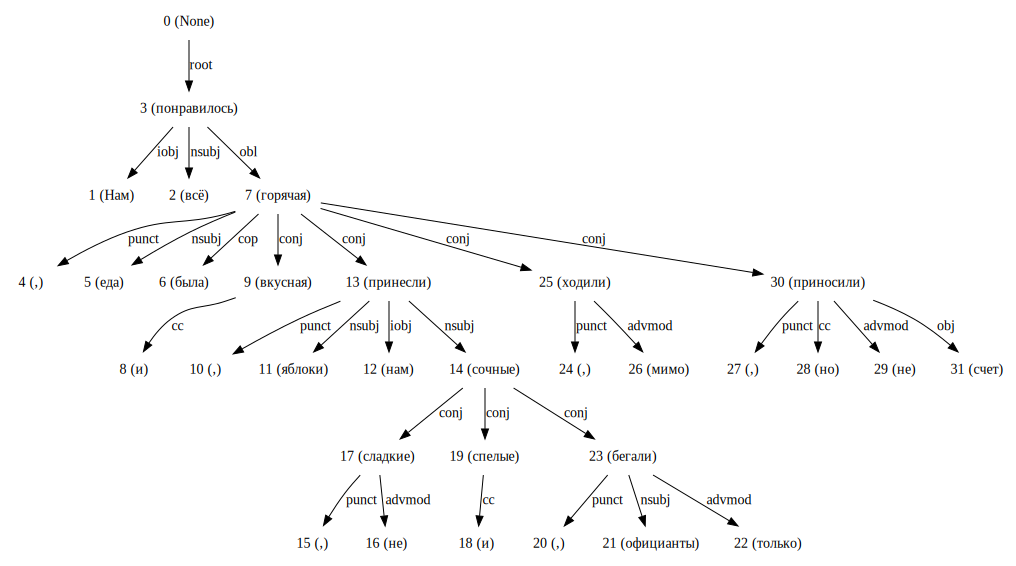

In [74]:
example = "Нам всё понравилось, еда была горячая и вкусная, яблоки нам принесли сочные, не сладкие и спелые, официанты только бегали, ходили мимо, но не приносили счет"

parsed_ex = [sent for sent in pipe.process(example).split('\n') if sent and not sent.startswith('#')]
dg = DependencyGraph(parsed_ex)
dg

In [0]:
from collections import defaultdict

class ConnectionGraph:
    node_map = {} # чтобы не хранить одни и те же строки по сто раз
    node_id = [] # чтобы и по id было быстро искать строку
    nodes = defaultdict(set)
    edges = defaultdict(int)
    conj = ('и', 'CCONJ')
    op = ('но', 'CCONJ')
    neg = ('не', 'PART')
    sentdict = defaultdict(int)
    errors = list()

    def __init__(self, corpus, targets, K=3):
        self.targets = targets
        self.K = K # коэффициент из статьи
        self.corpus = corpus
        print(len(corpus))

    def parse_conllu(self, conllu):
        sentences = conllu.split('\n\n')

        for sent in sentences:
            parsed = [token for token in sent.split('\n') if sent and not token.startswith('#')]
            if parsed:
                yield parsed
    
    def construct_graph(self):
        for id_c, f in enumerate(corpus):
            print(id_c)
            sentences = self.parse_conllu(f)

            for sent in sentences:
                try:
                    g = DependencyGraph(sent, top_relation_label="root")
                except AssertionError:
                    print('Caught: ', sent)
                    self.errors.append(sent)
                candidates = []
                for node in g.nodes:
                    n = g.nodes[node]
                    if n['ctag'] in targets:
                        if 'conj' in n['deps']:
                            candidates.append(n)
                self.check_candidates(candidates, g)

    def check_candidates(self, candidates, g):
        for node in candidates:
                pairs = set()
                deps = node['deps']['conj']
                for d in deps:
                    info = g.get_by_address(d)
                    relation = True
                    if info['ctag'] == node['ctag'] and info['feats'] == node['feats']:

                        try:
                            i = self.node_map[(node['lemma'], node['ctag'])]
                        except KeyError:
                            self.node_map[(node['lemma'], node['ctag'])] = len(self.node_id)
                            i = len(self.node_id)
                            self.node_id.append((node['lemma'], node['ctag']))
                            

                        try:
                            j = self.node_map[(info['lemma'], info['ctag'])]
                        except KeyError:
                            self.node_map[(info['lemma'], info['ctag'])] = len(self.node_id)
                            j = len(self.node_id)
                            self.node_id.append((info['lemma'], info['ctag']))


                        if 'cc' in info['deps']:
                            for word in info['deps']['cc']:
                                if g.get_by_address(word)['lemma'] == self.op:
                                    relation = not relation
                        
                        if 'advmod' in info['deps']:
                            for word in info['deps']['advmod']:
                                if g.get_by_address(word)['lemma'] == self.neg:
                                    relation = not relation
                        pairs.add((i, j, relation))
                        self.nodes[i].add(j)
                        self.nodes[j].add(i)
                self.add_pairs(pairs)

    def add_pairs(self, pairs):
        pairs = list(pairs)
        c = len(pairs)
        for id_, pair in enumerate(pairs):
            if pair[2] is True:
                self.edges[tuple(pair[:-1])] += 1
            else:
                self.edges[tuple(pair[:-1])] -= 1 * self.K
            if id_ == c:
                break
            for another in pairs[id_+1:]:
                    relation = pair[2] == another[2]
                    if relation:
                        self.edges[(pair[1], another[1])] += 1
                    else:
                        self.edges[(pair[1], another[1])] -= 1 * self.K         
            
    def extend_seed(self, seed, new=False):
        # В статье как-то не завезли обсуждения, как надо считать — по одной самой "прочной" связи или по сумме всех, и я выбрала считать по сумме
        if new:
            self.sentdict = defaultdict(int)
        for key in seed:
            word_tag, value = key, bool(int(seed[key]))
            if word_tag in self.node_map:
                i_ = self.node_map[word_tag]
                sisters = self.nodes[i_]
                for s in sisters:
                    if value:
                        self.sentdict[s] += self.edges[(i_, s)]
                    else:
                        self.sentdict[s] -= self.edges[(i_, s)]
        return {self.node_id[i]:self.sentdict[i] for i in self.sentdict}

In [0]:
import os

def iterate_over_corpus(root_d):
    # маленький генератор отзывов, не все ж в память грузить
    files = os.listdir(root_d)
    for i in files:
        with open(os.path.join(train_d, i), 'r') as f:
            ex = f.read()
            yield ex



In [0]:
example_corpora = iterate_over_corpus(train_d)

In [0]:
a = ConnectionGraph(example_corpora, targets, K=1)

101


In [0]:
%time #well it was worth trying, right?
a.construct_graph()

11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
Caught:  ['1\t-\t-\tPUNCT\t_\t_\t3\tpunct\t_\t_', '2\tпо\tпо\tADP\t_\t_\t3\tcase\t_\t_', '3\tприезду\tприезд\tNOUN\t_\tAnimacy=Inan|Case=Dat|Gender=Masc|Number=Sing\t14\tobl\t_\tSpaceAfter=No', '4\t,\t,\tPUNCT\t_\t_\t5\tpunct\t_\t_', '5\tадминистратор\tадминистратор\tNOUN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t3\tconj\t_\t_', '6\t(\t(\tPUNCT\t_\t_\t8\tpunct\t_\tSpaceAfter=No', '7\tили\tили\tCCONJ\t_\t_\t8\tcc\t_\t_', '8\tможет\tмочь\tVERB\t_\tAspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tparataxis\t_\t_', '9\tэта\tэтот\tDET\t_\tCase=Nom|Gender=Fem|Number=Sing\t10\tdet\t_\t_', '10\tдолжность\tдолжность\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\t12\tnsubj\t_\t_', '11\tпо-другому\tпо-другом

In [0]:
a.extend_seed(food)

{('-густый', 'ADJ'): 0,
 ('.но', 'ADJ'): 0,
 ('Аккуратненький', 'ADJ'): 0,
 ('Ароматный', 'ADJ'): 0,
 ('Атмосферный', 'ADJ'): 2,
 ('БЕЗвкусный', 'ADJ'): -2,
 ('Вежливый', 'ADJ'): 0,
 ('Вкусно', 'ADJ'): 0,
 ('Вкусный', 'ADJ'): 0,
 ('Водянистый', 'ADJ'): -2,
 ('Дороговато', 'ADJ'): 0,
 ('Дружелюбный', 'ADJ'): 0,
 ('Душевный', 'ADJ'): 2,
 ('ЖЕЛАЕМО', 'ADJ'): 2,
 ('Жидко', 'ADJ'): 0,
 ('Интеллигентный', 'ADJ'): 2,
 ('Каминный', 'ADJ'): 0,
 ('Кислый', 'ADJ'): 0,
 ('Красненький', 'ADJ'): 0,
 ('Лёгкий', 'ADJ'): 0,
 ('Малолюдно', 'ADJ'): 0,
 ('Мексиканский', 'ADJ'): 0,
 ('Милой', 'ADJ'): 0,
 ('Милый', 'ADJ'): 0,
 ('НЕпафосный', 'ADJ'): 0,
 ('Невкусно', 'ADJ'): 0,
 ('Негромкий', 'ADJ'): 0,
 ('Нежный', 'ADJ'): 0,
 ('Неожиданский', 'ADJ'): 0,
 ('Непохожий', 'ADJ'): 2,
 ('Непривычно', 'ADJ'): 0,
 ('Нетривиально', 'ADJ'): 0,
 ('ОБИЛЬН', 'ADJ'): 0,
 ('Облепиховый', 'ADJ'): 0,
 ('Обширный', 'ADJ'): 0,
 ('Отличный', 'ADJ'): 0,
 ('Отменный', 'ADJ'): 0,
 ('Питкий', 'ADJ'): 0,
 ('Плотный', 'ADJ'): 0,
 ('

In [0]:
len(a.node_map)

1460

In [0]:
set(a.sentdict.values())

{-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14, 35}

In [0]:
b = list(a.extend_seed(food).items())
food_sent = sorted(b, key=lambda x:x[1]) #Словарь, в который сложена инфа о том, где слово на шкале от отрицательных до положительных

In [0]:
import pickle
if not os.path.exists('/content/drive/My Drive/avtobreja'):
    os.mkdir('/content/drive/My Drive/avtobreja')
with open('/content/drive/My Drive/avtobreja/graph_dump.pickle', 'wb') as f:
    pickle.dump(a, f)

In [0]:
with open('/content/drive/My Drive/avtobreja/food_sent.csv', 'a') as f:
    for elm in food_sent:
        f.write('{}\t{}\t{}\n'.format(elm[0][0], elm[0][1], elm[1]))

In [0]:
c = list(a.extend_seed(service, new=True))
service_sent = sorted(b, key=lambda x:x[1]) #Словарь, в который сложена инфа о том, где слово на шкале от отрицательных до положительных

In [0]:
service_sent

[(('плохой', 'ADJ'), -30),
 (('ужасный', 'ADJ'), -6),
 (('горьковатый', 'ADJ'), -6),
 (('тонковатый', 'ADJ'), -3),
 (('первый', 'ADJ'), -3),
 (('жесткий', 'ADJ'), -3),
 (('мелкий', 'ADJ'), -3),
 (('темный', 'ADJ'), -3),
 (('ясный', 'ADJ'), -3),
 (('медленный', 'ADJ'), -3),
 (('съедобно', 'ADJ'), -3),
 (('терпимый', 'ADJ'), -3),
 (('ниже', 'ADJ'), -3),
 (('идеально', 'ADJ'), -3),
 (('обильна', 'ADJ'), -3),
 (('обыкновенный', 'ADJ'), -3),
 (('недосоленный', 'ADJ'), -3),
 (('суховат', 'ADJ'), -3),
 (('халтурный', 'ADJ'), -3),
 (('глупо', 'ADJ'), -3),
 (('дымный', 'ADJ'), -3),
 (('шедеврально', 'ADJ'), -3),
 (('некрасиво', 'ADJ'), -3),
 (('глуповатый', 'ADJ'), -3),
 (('предсказуемый', 'ADJ'), -3),
 (('суховатый', 'ADJ'), -3),
 (('поджареный', 'ADJ'), -3),
 (('некрасивый', 'ADJ'), -3),
 (('негорячо', 'ADJ'), -3),
 (('несъедобный', 'ADJ'), -3),
 (('дешевенький', 'ADJ'), -3),
 (('невзрачный', 'ADJ'), -3),
 (('Водянистый', 'ADJ'), -3),
 (('БЕЗвкусный', 'ADJ'), -3),
 (('неизящный', 'ADJ'), -3),

In [0]:
with open('/content/drive/My Drive/avtobreja/service_sent_true.csv', 'a') as f:
    for elm in service_sent:
        f.write('{}\t{}\t{}\n'.format(elm[0][0], elm[0][1], elm[1]))

Результаты лежат [тут](https://drive.google.com/open?id=1KsuysTsJGQrGpEVXtKuXHED8b6kOqJTG)

In [0]:
with open('/content/drive/My Drive/avtobreja/service_sent_true.csv', 'r') as f:
    serv = f.read()

serv_dict = {}
for i in serv.split('\n'):
    if i:
        word, tag, p = i.split('\t')
        serv_dict[(word, tag)] = int(p)

In [0]:
with open('/content/drive/My Drive/avtobreja/food_sent.csv', 'r') as f:
    fd = f.read()

fd_dict = {}
for i in fd.split('\n'):
    if i:
        word, tag, p = i.split('\t')
        fd_dict[(word, tag)] = int(p)

In [15]:
serv_dict

{('-густый', 'ADJ'): 0,
 ('.но', 'ADJ'): 0,
 ('Аккуратненький', 'ADJ'): 0,
 ('Ароматный', 'ADJ'): 0,
 ('Атмосферный', 'ADJ'): 3,
 ('БЕЗвкусный', 'ADJ'): -3,
 ('Вежливый', 'ADJ'): 0,
 ('Вкусно', 'ADJ'): 0,
 ('Вкусный', 'ADJ'): 0,
 ('Водянистый', 'ADJ'): -3,
 ('Дороговато', 'ADJ'): 0,
 ('Дружелюбный', 'ADJ'): 0,
 ('Душевный', 'ADJ'): 3,
 ('ЖЕЛАЕМО', 'ADJ'): 3,
 ('Жидко', 'ADJ'): 0,
 ('Интеллигентный', 'ADJ'): 3,
 ('Каминный', 'ADJ'): 0,
 ('Кислый', 'ADJ'): 0,
 ('Красненький', 'ADJ'): 0,
 ('Лёгкий', 'ADJ'): 0,
 ('Малолюдно', 'ADJ'): 0,
 ('Мексиканский', 'ADJ'): 0,
 ('Милой', 'ADJ'): 0,
 ('Милый', 'ADJ'): 0,
 ('НЕпафосный', 'ADJ'): 0,
 ('Невкусно', 'ADJ'): 0,
 ('Негромкий', 'ADJ'): 0,
 ('Нежный', 'ADJ'): 0,
 ('Неожиданский', 'ADJ'): 0,
 ('Непохожий', 'ADJ'): 3,
 ('Непривычно', 'ADJ'): 0,
 ('Нетривиально', 'ADJ'): 0,
 ('ОБИЛЬН', 'ADJ'): 0,
 ('Облепиховый', 'ADJ'): 0,
 ('Обширный', 'ADJ'): 0,
 ('Отличный', 'ADJ'): 0,
 ('Отменный', 'ADJ'): 0,
 ('Питкий', 'ADJ'): 0,
 ('Плотный', 'ADJ'): 0,
 ('

## Классификация слов

Делим все найденные слова на два класса, опираясь на положение сидов в готовой шкале.

In [0]:
positive = []
negative = []
for key in service:
    if service[key] == '1':
        positive.append(serv_dict[key])
    else:
        try:
            negative.append(serv_dict[key])
        except KeyError:
            pass

In [59]:
ps = sorted(positive)
ps

[0, 6, 9, 15, 15, 24, 27, 30, 36, 51, 60, 66, 78, 81, 90, 198, 288]

In [51]:
sorted(negative) # упс, негативный сид был один, и в корпус не попал.

[]

In [0]:
positive_f = []
negative_f = []
for key in food:
    if food[key] == '1':
        try:
            positive_f.append(fd_dict[key])
        except KeyError:
            pass
    else:
        try:
            negative_f.append(fd_dict[key])
        except KeyError:
            pass

In [48]:
sorted(positive_f)

[0, 6, 9, 9, 15, 45, 99, 99, 105, 138, 147, 198, 273, 297, 861]

In [56]:
nf = sorted(negative_f)
nf

[-30, 9]

In [0]:
food_dict_tf = {}
for key in fd_dict:
    if fd_dict[key] <= nf[-1]: # делим по верхней границе негативных сидов
        food_dict_tf[key] = 0
    else:
        food_dict_tf[key] = 1

In [0]:
service_dict_tf = {}
for key in serv_dict:
    if serv_dict[key] >= ps[0]: # делим по нижней границе позитивных сидов
        service_dict_tf[key] = 1
    else:
        service_dict_tf[key] = 0

In [0]:
def write_dict(path, d):
    with open(path, 'a') as f:
        for elm in d.items():
            f.write('{}\t{}\t{}\n'.format(elm[0][0], elm[0][1], elm[1]))


Запишем результаты в файлы.

In [0]:
write_dict('/content/drive/My Drive/avtobreja/service_sentiment.csv', service_dict_tf)

In [0]:
write_dict('/content/drive/My Drive/avtobreja/food_sentiment.csv', food_dict_tf)

In [66]:
service_dict_tf

{('-густый', 'ADJ'): 1,
 ('.но', 'ADJ'): 1,
 ('Аккуратненький', 'ADJ'): 1,
 ('Ароматный', 'ADJ'): 1,
 ('Атмосферный', 'ADJ'): 1,
 ('БЕЗвкусный', 'ADJ'): 0,
 ('Вежливый', 'ADJ'): 1,
 ('Вкусно', 'ADJ'): 1,
 ('Вкусный', 'ADJ'): 1,
 ('Водянистый', 'ADJ'): 0,
 ('Дороговато', 'ADJ'): 1,
 ('Дружелюбный', 'ADJ'): 1,
 ('Душевный', 'ADJ'): 1,
 ('ЖЕЛАЕМО', 'ADJ'): 1,
 ('Жидко', 'ADJ'): 1,
 ('Интеллигентный', 'ADJ'): 1,
 ('Каминный', 'ADJ'): 1,
 ('Кислый', 'ADJ'): 1,
 ('Красненький', 'ADJ'): 1,
 ('Лёгкий', 'ADJ'): 1,
 ('Малолюдно', 'ADJ'): 1,
 ('Мексиканский', 'ADJ'): 1,
 ('Милой', 'ADJ'): 1,
 ('Милый', 'ADJ'): 1,
 ('НЕпафосный', 'ADJ'): 1,
 ('Невкусно', 'ADJ'): 1,
 ('Негромкий', 'ADJ'): 1,
 ('Нежный', 'ADJ'): 1,
 ('Неожиданский', 'ADJ'): 1,
 ('Непохожий', 'ADJ'): 1,
 ('Непривычно', 'ADJ'): 1,
 ('Нетривиально', 'ADJ'): 1,
 ('ОБИЛЬН', 'ADJ'): 1,
 ('Облепиховый', 'ADJ'): 1,
 ('Обширный', 'ADJ'): 1,
 ('Отличный', 'ADJ'): 1,
 ('Отменный', 'ADJ'): 1,
 ('Питкий', 'ADJ'): 1,
 ('Плотный', 'ADJ'): 1,
 ('По